In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
from bs4 import BeautifulSoup


In [3]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [5]:
df=pd.read_csv("/content/drive/MyDrive/question_pair/train.csv")
df.shape

(404351, 6)

In [6]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [7]:
df.shape

(404351, 6)

In [8]:
new_df=df.sample(80000,random_state=3)
new_df.shape

(80000, 6)

In [9]:
new_df.head()


,id,qid1,qid2,question1,question2,is_duplicate
316514,316514,621099,621100,How do you decide what career is best for you?,What is the best way to find a career which su...,1
93351,93351,185328,185329,How can I improve my English in all aspects?,How can I improve my English speaking .?,1
85118,85118,169048,169049,Why is it that 1 litre of water weighs 1 kg wh...,If you drink 3 liters of water would you weigh...,0
201278,201278,397188,397189,Why didn't Native Americans make alcohol?,Why didn't the Japanese develop a deep-seated ...,0
323685,323685,634952,634953,I have an unopened bottle of vodka in the free...,Can an open bottle of vodka get spoiled? It is...,0


In [10]:
def preprocess(q):
  q=str(q).lower().strip()
  q=BeautifulSoup(q)
  q=q.get_text()

  q=q.replace("%"," percent")
  q=q.replace("$"," dollar ")
  q=q.replace("₹"," ruppees ")
  q=q.replace("€"," euro ")
  q=q.replace("@"," at ")
  q=q.replace("&"," and ")

  q=q.replace("[math]","")

  q=q.replace(",000,000,000","b")
  q=q.replace(",000,000","m")
  q=q.replace(",000","k")
  q=re.sub(r"([0-9]+)000000000",r"\1b",q)
  q=re.sub(r"([0-9]+)000000",r"\1m",q)
  q=re.sub(r"([0-9]+)000",r"\1k",q)

  contractions= {
  "ain't": "am not",
  "aren't": "are not",
  "can't": "cannot",
  "can't've": "cannot have",
  "'cause": "because",
  "could've": "could have",
  "couldn't": "could not",
  "couldn't've": "could not have",
  "didn't": "did not",
  "doesn't": "does not",
  "don't": "do not",
  "hadn't": "had not",
  "hadn't've": "had not have",
  "hasn't": "has not",
  "haven't": "have not",
  "he'd": "he would",
  "he'd've": "he would have",
  "he'll": "he will",
  "he'll've": "he will have",
  "he's": "he is",
  "how'd": "how did",
  "how'd'y": "how do you",
  "how'll": "how will",
  "how's": "how is",
  "i'd": "i would",
  "i'd've": "i would have",
  "i'll": "i will",
  "i'll've": "i will have",
  "i'm": "i am",
  "i've": "i have",
  "isn't": "is not",
  "it'd": "it had",
  "it'd've": "it would have",
  "it'll": "it will",
  "it'll've": "it will have",
  "it's": "it is",
  "let's": "let us",
  "ma'am": "madam",
  "mayn't": "may not",
  "might've": "might have",
  "mightn't": "might not",
  "mightn't've": "might not have",
  "must've": "must have",
  "mustn't": "must not",
  "mustn't've": "must not have",
  "needn't": "need not",
  "needn't've": "need not have",
  "o'clock": "of the clock",
  "oughtn't": "ought not",
  "oughtn't've": "ought not have",
  "shan't": "shall not",
  "sha'n't": "shall not",
  "shan't've": "shall not have",
  "she'd": "she would",
  "she'd've": "she would have",
  "she'll": "she will",
  "she'll've": "she will have",
  "she's": "she is",
  "should've": "should have",
  "shouldn't": "should not",
  "shouldn't've": "should not have",
  "so've": "so have",
  "so's": "so is",
  "that'd": "that would",
  "that'd've": "that would have",
  "that's": "that is",
  "there'd": "there had",
  "there'd've": "there would have",
  "there's": "there is",
  "they'd": "they would",
  "they'd've": "they would have",
  "they'll": "they will",
  "they'll've": "they will have",
  "they're": "they are",
  "they've": "they have",
  "to've": "to have",
  "wasn't": "was not",
  "we'd": "we had",
  "we'd've": "we would have",
  "we'll": "we will",
  "we'll've": "we will have",
  "we're": "we are",
  "we've": "we have",
  "weren't": "were not",
  "what'll": "what will",
  "what'll've": "what will have",
  "what're": "what are",
  "what's": "what is",
  "what've": "what have",
  "when's": "when is",
  "when've": "when have",
  "where'd": "where did",
  "where's": "where is",
  "where've": "where have",
  "who'll": "who will",
  "who'll've": "who will have",
  "who's": "who is",
  "who've": "who have",
  "why's": "why is",
  "why've": "why have",
  "will've": "will have",
  "won't": "will not",
  "won't've": "will not have",
  "would've": "would have",
  "wouldn't": "would not",
  "wouldn't've": "would not have",
  "y'all": "you all",
  "y'alls": "you alls",
  "y'all'd": "you all would",
  "y'all'd've": "you all would have",
  "y'all're": "you all are",
  "y'all've": "you all have",
  "you'd": "you had",
  "you'd've": "you would have",
  "you'll": "you you will",
  "you'll've": "you you will have",
  "you're": "you are",
  "you've": "you have"
}
  q_decontracted=[]

  for word in q.split():
    if word in contractions:
        word=contractions[word]

    q_decontracted.append(word)


  q=" ".join(q_decontracted)
  q=str(q).lower().strip()
  q=q.replace("'ve"," have")
  q=q.replace("n't"," not")
  q=q.replace("'re"," are")
  q=q.replace("'ll"," will")


  pattern=re.compile("\W")
  q=re.sub(pattern," ",q).strip()

  return q


In [11]:
preprocess("<strong>I'll go to <b>the</b> market</strong>")


'i will go to the market'

In [12]:
new_df["question1"]=new_df["question1"].apply(preprocess)
new_df["question2"]=new_df["question2"].apply(preprocess)

<ipython-input-10-6035f68c0c63>:3: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  q=BeautifulSoup(q)
<ipython-input-10-6035f68c0c63>:3: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  q=BeautifulSoup(q)


In [13]:
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate
316514,316514,621099,621100,how do you decide what career is best for you,what is the best way to find a career which su...,1
93351,93351,185328,185329,how can i improve my english in all aspects,how can i improve my english speaking,1
85118,85118,169048,169049,why is it that 1 litre of water weighs 1 kg wh...,if you drink 3 liters of water would you weigh...,0
201278,201278,397188,397189,why did not native americans make alcohol,why did not the japanese develop a deep seated...,0
323685,323685,634952,634953,i have an unopened bottle of vodka in the free...,can an open bottle of vodka get spoiled it is...,0


In [14]:
new_df["q1_len"]=new_df["question1"].str.len()
new_df["q2_len"]=new_df["question2"].str.len()

In [15]:
new_df["q1_num_words"]=new_df["question1"].apply(lambda row: len(row.split(" ")))
new_df["q2_num_words"]=new_df["question2"].apply(lambda row: len(row.split(" ")))

In [16]:
def common_words(row):
    w1=set(map(lambda word: word.lower().strip() , row["question1"].split(" ")))
    w2=set(map(lambda word: word.lower().strip() , row["question2"].split(" ")))
    return len(w1 & w2)

In [17]:
new_df["common_words"]=new_df.apply(common_words,axis=1)

In [18]:
def total_words(row):
    w1=set(map(lambda word: word.lower().strip() , row["question1"].split(" ")))
    w2=set(map(lambda word: word.lower().strip() , row["question2"].split(" ")))
    return len(w1) + len(w2)


In [19]:
new_df["total_words"]=new_df.apply(total_words,axis=1)


In [20]:
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,common_words,total_words
316514,316514,621099,621100,how do you decide what career is best for you,what is the best way to find a career which su...,1,45,52,10,12,4,21
93351,93351,185328,185329,how can i improve my english in all aspects,how can i improve my english speaking,1,43,37,9,7,6,16
85118,85118,169048,169049,why is it that 1 litre of water weighs 1 kg wh...,if you drink 3 liters of water would you weigh...,0,87,56,19,13,3,29
201278,201278,397188,397189,why did not native americans make alcohol,why did not the japanese develop a deep seated...,0,41,123,7,20,4,26
323685,323685,634952,634953,i have an unopened bottle of vodka in the free...,can an open bottle of vodka get spoiled it is...,0,93,79,19,19,6,37


In [21]:
new_df["word_share"]=round(new_df["common_words"]/new_df['total_words']*100,2)

In [22]:
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,common_words,total_words,word_share
316514,316514,621099,621100,how do you decide what career is best for you,what is the best way to find a career which su...,1,45,52,10,12,4,21,19.05
93351,93351,185328,185329,how can i improve my english in all aspects,how can i improve my english speaking,1,43,37,9,7,6,16,37.50
85118,85118,169048,169049,why is it that 1 litre of water weighs 1 kg wh...,if you drink 3 liters of water would you weigh...,0,87,56,19,13,3,29,10.34
201278,201278,397188,397189,why did not native americans make alcohol,why did not the japanese develop a deep seated...,0,41,123,7,20,4,26,15.38
323685,323685,634952,634953,i have an unopened bottle of vodka in the free...,can an open bottle of vodka get spoiled it is...,0,93,79,19,19,6,37,16.22


In [23]:
!pip install nltk
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [24]:
from nltk.corpus import stopwords

def fetch_token_features(row):
    q1=row["question1"]
    q2=row["question2"]
    STOP_WORDS=stopwords.words("english")
    SAFE_DIV=0.0001
    token_features=[0.0]*8

    q1_tokens=q1.split(" ")
    q2_tokens=q2.split(" ")

    if (len(q1_tokens)==0 or (len(q2_tokens)==0)):
        return token_features

    q1_words=set([word for word in q1_tokens if word not in STOP_WORDS])
    q2_words=set([word for word in q2_tokens if word not in STOP_WORDS])


    q1_stop=set([word for word in q1_tokens if word in STOP_WORDS])
    q2_stop=set([word for word in q2_tokens if word in STOP_WORDS])

    common_word_count=len(q1_words.intersection(q2_words))


    common_stop_count=len(q1_stop.intersection(q2_stop))


    common_token_count=len(set(q1_tokens).intersection(set(q2_tokens)))

    token_features[0]=common_word_count/(min(len(q1_tokens),len(q2_tokens)+SAFE_DIV))
    token_features[1]=common_word_count/(max(len(q1_tokens),len(q2_tokens)+SAFE_DIV))

    token_features[2]=common_stop_count/(min(len(q1_tokens),len(q2_tokens)+SAFE_DIV))
    token_features[3]=common_stop_count/(max(len(q1_tokens),len(q2_tokens)+SAFE_DIV))

    token_features[4]=common_token_count/(min(len(q1_tokens),len(q2_tokens)+SAFE_DIV))
    token_features[5]=common_token_count/(max(len(q1_tokens),len(q2_tokens)+SAFE_DIV))

    token_features[6]=int(q1_tokens[-1]==q2_tokens[-1])

    token_features[7]=int(q1_tokens[0]==q2_tokens[0])

    return token_features






In [25]:
token_features=new_df.apply(fetch_token_features,axis=1)

new_df["cwc_min"] = list(map(lambda x : x[0], token_features))
new_df["cwc_max"] = list(map(lambda x : x[1] ,token_features))
new_df["csc_min"] = list(map(lambda x : x[2], token_features))
new_df["csc_max"] = list(map(lambda x : x[3], token_features))
new_df["ctc_min"] = list(map(lambda x : x[4], token_features))
new_df["ctc_max"] = list(map(lambda x : x[5], token_features))
new_df["last_word_eq"] = list(map(lambda x : x[6], token_features))
new_df["first_word_eq"] = list(map(lambda x : x[7], token_features))

In [26]:
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,...,total_words,word_share,cwc_min,cwc_max,csc_min,csc_max,ctc_min,ctc_max,last_word_eq,first_word_eq
316514,316514,621099,621100,how do you decide what career is best for you,what is the best way to find a career which su...,1,45,52,10,12,...,21,19.05,0.200000,0.166665,0.200000,0.166665,0.400000,0.333331,0,0
93351,93351,185328,185329,how can i improve my english in all aspects,how can i improve my english speaking,1,43,37,9,7,...,16,37.50,0.285710,0.222222,0.571420,0.444444,0.857131,0.666667,0,1
85118,85118,169048,169049,why is it that 1 litre of water weighs 1 kg wh...,if you drink 3 liters of water would you weigh...,0,87,56,19,13,...,29,10.34,0.153845,0.105263,0.076922,0.052632,0.230767,0.157895,0,0
201278,201278,397188,397189,why did not native americans make alcohol,why did not the japanese develop a deep seated...,0,41,123,7,20,...,26,15.38,0.142857,0.050000,0.428571,0.149999,0.571429,0.199999,0,1
323685,323685,634952,634953,i have an unopened bottle of vodka in the free...,can an open bottle of vodka get spoiled it is...,0,93,79,19,19,...,37,16.22,0.157895,0.157894,0.157895,0.157894,0.315789,0.315788,0,0


In [27]:
!pip install distance
import distance
def fetch_length_features(row):
    q1=row["question1"]
    q2=row["question2"]

    q1_tokens=q1.split(" ")
    q2_tokens=q2.split(" ")

    length_features=[0.0]*3

    if len(q1_tokens)==0 or len(q2_tokens)==0:
        return length_features

    #abs length
    length_features[0]= abs(len(q1_tokens)-len(q2_tokens))

    #avg length
    length_features[1] = (len(q1_tokens)+len(q2_tokens)) / 2

    strs=list(distance.lcsubstrings(q1,q2))
    try:
        length_features[2]=len(strs[0])/(min(len(q1) ,len(q2))+1)
    except:
        length_features[2]=0

    return length_features



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 180.3/180.3 kB 1.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for distance: filename=Distance-0.1.3-py3-none-any.whl size=16258 sha256=d8207b9e3a59a4e57d3a8156b17e191fc77abb8c47bb4f9737e5c280990b274a
  Stored in directory: /root/.cache/pip/wheels/e8/bb/de/f71bf63559ea9a921059a5405806f7ff6ed612a9231c4a9309
Successfully built distance


In [28]:
length_features=new_df.apply(fetch_length_features,axis=1)

new_df['abs_len_diff']=list(map(lambda x:x[0],length_features))
new_df['mean_len']=list(map(lambda x:x[1],length_features))
new_df['longest_substr_ratio']=list(map(lambda x:x[2],length_features))

In [29]:
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,...,cwc_max,csc_min,csc_max,ctc_min,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,longest_substr_ratio
316514,316514,621099,621100,how do you decide what career is best for you,what is the best way to find a career which su...,1,45,52,10,12,...,0.166665,0.200000,0.166665,0.400000,0.333331,0,0,2,11.0,0.173913
93351,93351,185328,185329,how can i improve my english in all aspects,how can i improve my english speaking,1,43,37,9,7,...,0.222222,0.571420,0.444444,0.857131,0.666667,0,1,2,8.0,0.763158
85118,85118,169048,169049,why is it that 1 litre of water weighs 1 kg wh...,if you drink 3 liters of water would you weigh...,0,87,56,19,13,...,0.105263,0.076922,0.052632,0.230767,0.157895,0,0,6,16.0,0.192982
201278,201278,397188,397189,why did not native americans make alcohol,why did not the japanese develop a deep seated...,0,41,123,7,20,...,0.050000,0.428571,0.149999,0.571429,0.199999,0,1,13,13.5,0.285714
323685,323685,634952,634953,i have an unopened bottle of vodka in the free...,can an open bottle of vodka get spoiled it is...,0,93,79,19,19,...,0.157894,0.157895,0.157894,0.315789,0.315788,0,0,0,19.0,0.212500


In [30]:
!pip install fuzzywuzzy
from fuzzywuzzy import fuzz

def fetch_fuzzy_features(row):
    q1=row["question1"]
    q2=row["question2"]

    fuzzy_features=[0.0]*4

    fuzzy_features[0]=fuzz.QRatio(q1,q2)

    fuzzy_features[1]=fuzz.partial_ratio(q1,q2)

    fuzzy_features[2]=fuzz.token_sort_ratio(q1,q2)

    fuzzy_features[3]=fuzz.token_set_ratio(q1,q2)

    return fuzzy_features



/usr/local/lib/python3.10/dist-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [31]:
fuzzy_features = new_df.apply(fetch_fuzzy_features,axis=1)

new_df["fuzz_ratio"]=list(map(lambda x:x[0],fuzzy_features))
new_df["fuzz_partial_ratio"]=list(map(lambda x:x[1],fuzzy_features))
new_df["token_sort_ratio"]=list(map(lambda x:x[2],fuzzy_features))
new_df["token_set_ratio"]=list(map(lambda x:x[3],fuzzy_features))

In [32]:
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,...,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,longest_substr_ratio,fuzz_ratio,fuzz_partial_ratio,token_sort_ratio,token_set_ratio
316514,316514,621099,621100,how do you decide what career is best for you,what is the best way to find a career which su...,1,45,52,10,12,...,0.333331,0,0,2,11.0,0.173913,33,45,45,63
93351,93351,185328,185329,how can i improve my english in all aspects,how can i improve my english speaking,1,43,37,9,7,...,0.666667,0,1,2,8.0,0.763158,80,84,70,86
85118,85118,169048,169049,why is it that 1 litre of water weighs 1 kg wh...,if you drink 3 liters of water would you weigh...,0,87,56,19,13,...,0.157895,0,0,6,16.0,0.192982,45,55,50,50
201278,201278,397188,397189,why did not native americans make alcohol,why did not the japanese develop a deep seated...,0,41,123,7,20,...,0.199999,0,1,13,13.5,0.285714,43,51,38,68
323685,323685,634952,634953,i have an unopened bottle of vodka in the free...,can an open bottle of vodka get spoiled it is...,0,93,79,19,19,...,0.315788,0,0,0,19.0,0.212500,52,51,49,47


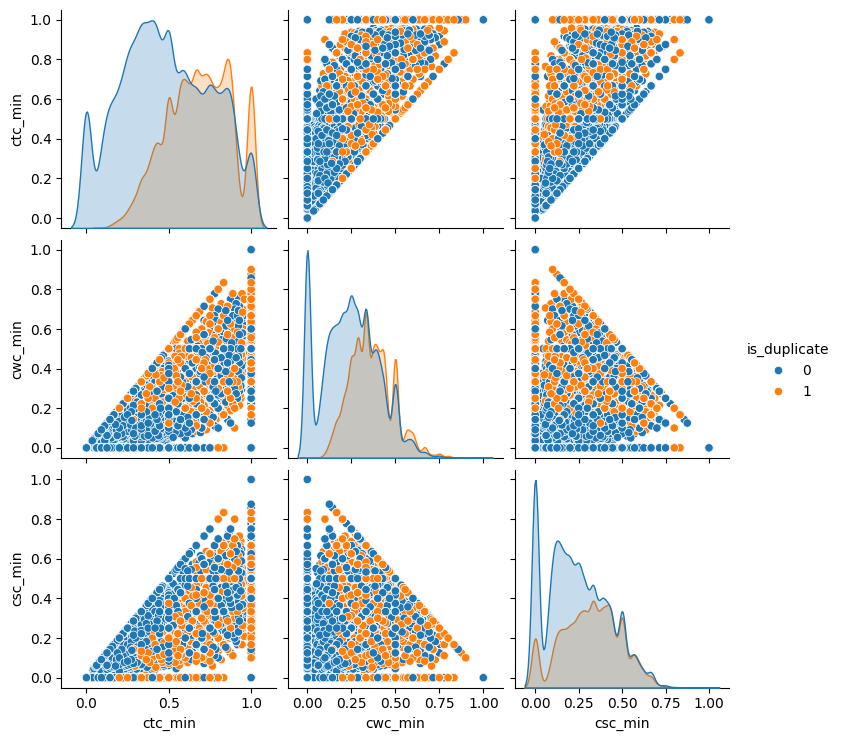

In [33]:
sns.pairplot(new_df[["ctc_min","cwc_min","csc_min","is_duplicate"]],hue= "is_duplicate")

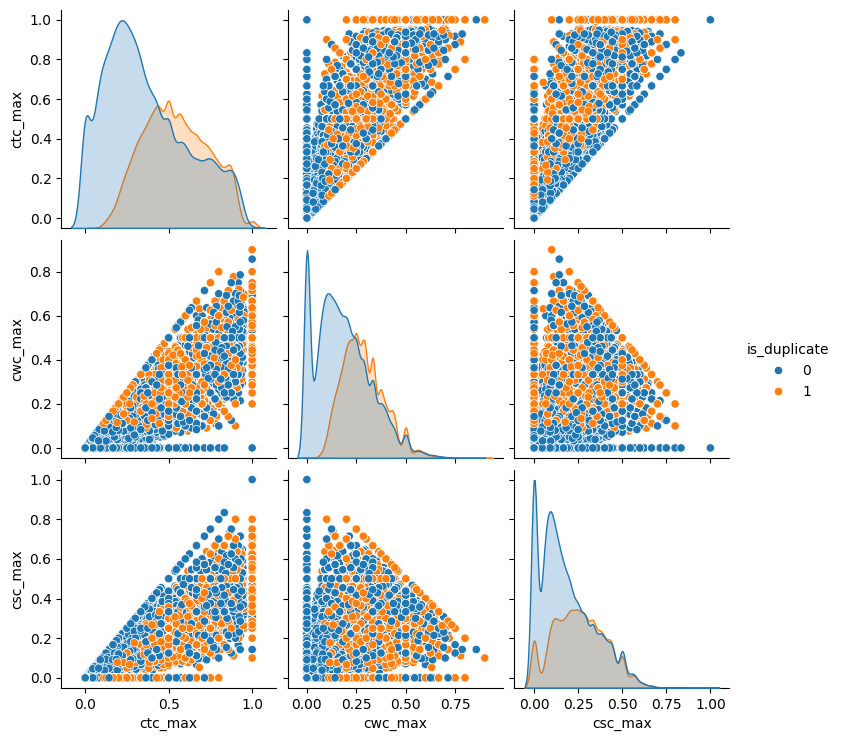

In [34]:
sns.pairplot(new_df[["ctc_max","cwc_max","csc_max","is_duplicate"]],hue= "is_duplicate")


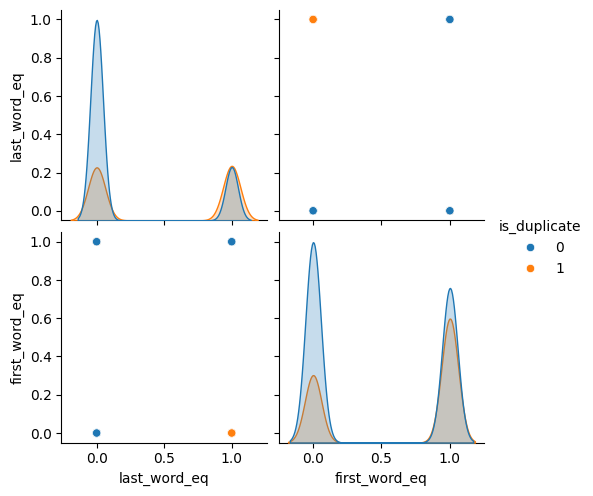

In [35]:
sns.pairplot(new_df[["last_word_eq","first_word_eq","is_duplicate"]],hue= "is_duplicate")


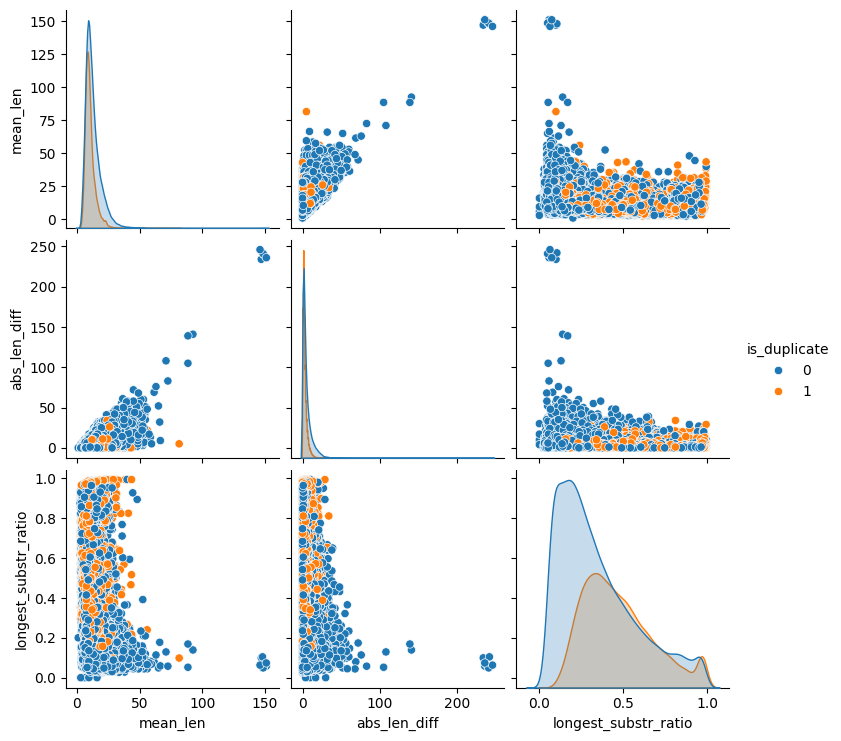

In [36]:
sns.pairplot(new_df[["mean_len","abs_len_diff","longest_substr_ratio","is_duplicate"]],hue= "is_duplicate")


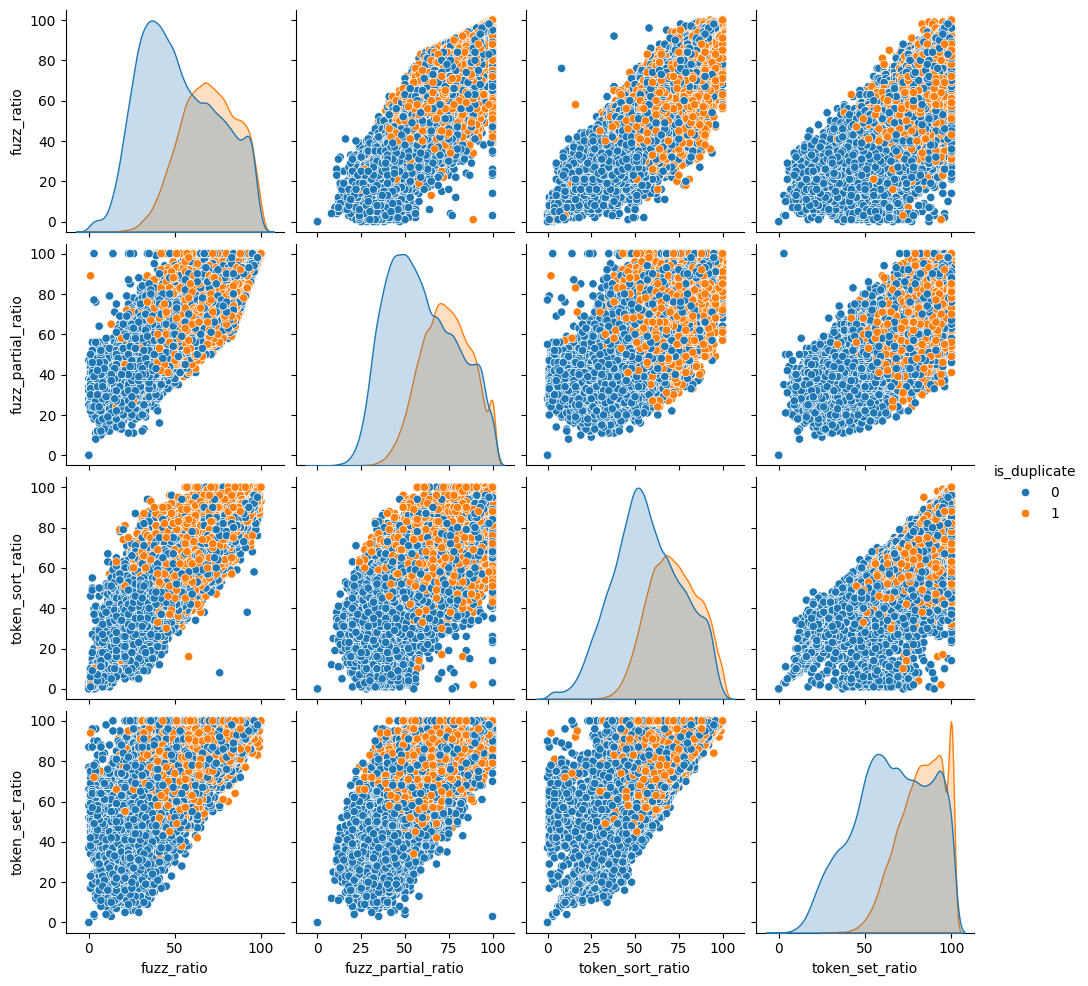

In [37]:
sns.pairplot(new_df[["fuzz_ratio","fuzz_partial_ratio","token_sort_ratio","token_set_ratio","is_duplicate"]],hue= "is_duplicate")


In [38]:
from sklearn.preprocessing import MinMaxScaler
X=MinMaxScaler().fit_transform(new_df[["cwc_min","cwc_max","csc_min","csc_max","ctc_min","ctc_max","last_word_eq","first_word_eq","mean_len","abs_len_diff","longest_substr_ratio","fuzz_ratio","fuzz_partial_ratio","token_sort_ratio","token_set_ratio"]])
y=new_df["is_duplicate"].values

In [41]:
# x_df=pd.DataFrame({'x':tsne2d[:,0],"y":tsne2d[:,1],"label":y})
# # sns.lmplot(data=x_df,x="x",y="y",hue="label",fit_reg=False,palette="Set1",markers=["s","o"])
# sns.lmplot(data=x_df, x='x', y='y', hue='label', fit_reg=False, height=8,palette="Set1",markers=['s','o'])

In [42]:
# tsne3d = TSNE(
#     n_components=3,
#     init='random',
#     random_state=101,
#     method='barnes_hut',
#     n_iter=1000,
#     verbose=2,
#     angle=0.5
# ).fit_transform(X)

In [43]:
# import plotly.graph_objs as go
# import plotly.tools as tls
# import plotly.offline as py
# py.init_notebook_mode(connected=True)

# trace1 = go.Scatter3d(
#     x=tsne3d[:,0],
#     y=tsne3d[:,1],
#     z=tsne3d[:,2],
#     mode='markers',
#     marker=dict(
#         sizemode='diameter',
#         color = y,
#         colorscale = 'Portland',
#         colorbar = dict(title = 'duplicate'),
#         line=dict(color='rgb(255, 255, 255)'),
#         opacity=0.75
#     )
# )

# data=[trace1]
# layout=dict(height=800, width=800, title='3d embedding with engineered features')
# fig=dict(data=data, layout=layout)
# py.iplot(fig, filename='3DBubble')

In [44]:
ques_df = new_df[['question1','question2']]
ques_df.head()

,question1,question2
316514,how do you decide what career is best for you,what is the best way to find a career which su...
93351,how can i improve my english in all aspects,how can i improve my english speaking
85118,why is it that 1 litre of water weighs 1 kg wh...,if you drink 3 liters of water would you weigh...
201278,why did not native americans make alcohol,why did not the japanese develop a deep seated...
323685,i have an unopened bottle of vodka in the free...,can an open bottle of vodka get spoiled it is...


In [45]:
final_df = new_df.drop(columns=['id','qid1','qid2','question1','question2'])
print(final_df.shape)
final_df.head()

(80000, 23)


,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,common_words,total_words,word_share,cwc_min,cwc_max,...,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,longest_substr_ratio,fuzz_ratio,fuzz_partial_ratio,token_sort_ratio,token_set_ratio
316514,1,45,52,10,12,4,21,19.05,0.200000,0.166665,...,0.333331,0,0,2,11.0,0.173913,33,45,45,63
93351,1,43,37,9,7,6,16,37.50,0.285710,0.222222,...,0.666667,0,1,2,8.0,0.763158,80,84,70,86
85118,0,87,56,19,13,3,29,10.34,0.153845,0.105263,...,0.157895,0,0,6,16.0,0.192982,45,55,50,50
201278,0,41,123,7,20,4,26,15.38,0.142857,0.050000,...,0.199999,0,1,13,13.5,0.285714,43,51,38,68
323685,0,93,79,19,19,6,37,16.22,0.157895,0.157894,...,0.315788,0,0,0,19.0,0.212500,52,51,49,47


In [46]:
from sklearn.feature_extraction.text import CountVectorizer

questions = list(ques_df['question1']) + list(ques_df['question2'])

cv = CountVectorizer(max_features=3000)
q1_arr, q2_arr = np.vsplit(cv.fit_transform(questions).toarray(),2)

In [47]:
temp_df1 = pd.DataFrame(q1_arr, index= ques_df.index)
temp_df2 = pd.DataFrame(q2_arr, index= ques_df.index)
temp_df = pd.concat([temp_df1, temp_df2], axis=1)
temp_df.shape

(80000, 6000)

In [48]:
final_df = pd.concat([final_df, temp_df], axis=1)
print(final_df.shape)
final_df.head()

(80000, 6023)


,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,common_words,total_words,word_share,cwc_min,cwc_max,...,2990,2991,2992,2993,2994,2995,2996,2997,2998,2999
316514,1,45,52,10,12,4,21,19.05,0.200000,0.166665,...,0,0,0,0,0,0,0,0,0,0
93351,1,43,37,9,7,6,16,37.50,0.285710,0.222222,...,0,0,0,0,0,0,0,0,0,0
85118,0,87,56,19,13,3,29,10.34,0.153845,0.105263,...,0,0,2,0,0,0,0,0,0,0
201278,0,41,123,7,20,4,26,15.38,0.142857,0.050000,...,0,0,0,0,0,0,0,0,0,0
323685,0,93,79,19,19,6,37,16.22,0.157895,0.157894,...,0,0,0,0,0,0,0,0,0,0


In [49]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(final_df.iloc[:,1:].values,final_df.iloc[:,0].values,test_size=0.2,random_state=1)

In [50]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf=RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred=rf.predict(X_test)
accuracy_score(y_test,y_pred)

0.797

In [51]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[8697, 1457],
       [1791, 4055]])

In [52]:
!pip install xgboost
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train,y_train)
y_pred1 = xgb.predict(X_test)
accuracy_score(y_test,y_pred1)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 297.1/297.1 MB 2.0 MB/s eta 0:00:00


0.7961875

In [53]:
confusion_matrix(y_test,y_pred1)

array([[8529, 1625],
       [1636, 4210]])

In [54]:
def test_common_words(q1,q2):
    w1 = set(map(lambda word: word.lower().strip(), q1.split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), q2.split(" ")))
    return len(w1 & w2)

In [55]:
def test_total_words(q1,q2):
    w1 = set(map(lambda word: word.lower().strip(), q1.split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), q2.split(" ")))
    return (len(w1) + len(w2))

In [56]:
def test_fetch_token_features(q1,q2):

    SAFE_DIV = 0.0001

    STOP_WORDS = stopwords.words("english")

    token_features = [0.0]*8


    q1_tokens = q1.split()
    q2_tokens = q2.split()

    if len(q1_tokens) == 0 or len(q2_tokens) == 0:
        return token_features

    q1_words = set([word for word in q1_tokens if word not in STOP_WORDS])
    q2_words = set([word for word in q2_tokens if word not in STOP_WORDS])

    q1_stops = set([word for word in q1_tokens if word in STOP_WORDS])
    q2_stops = set([word for word in q2_tokens if word in STOP_WORDS])

    common_word_count = len(q1_words.intersection(q2_words))

    common_stop_count = len(q1_stops.intersection(q2_stops))

    common_token_count = len(set(q1_tokens).intersection(set(q2_tokens)))


    token_features[0] = common_word_count / (min(len(q1_words), len(q2_words)) + SAFE_DIV)
    token_features[1] = common_word_count / (max(len(q1_words), len(q2_words)) + SAFE_DIV)
    token_features[2] = common_stop_count / (min(len(q1_stops), len(q2_stops)) + SAFE_DIV)
    token_features[3] = common_stop_count / (max(len(q1_stops), len(q2_stops)) + SAFE_DIV)
    token_features[4] = common_token_count / (min(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)
    token_features[5] = common_token_count / (max(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)

    token_features[6] = int(q1_tokens[-1] == q2_tokens[-1])

    token_features[7] = int(q1_tokens[0] == q2_tokens[0])

    return token_features

In [57]:
def test_fetch_length_features(q1,q2):

    length_features = [0.0]*3


    q1_tokens = q1.split()
    q2_tokens = q2.split()

    if len(q1_tokens) == 0 or len(q2_tokens) == 0:
        return length_features

    length_features[0] = abs(len(q1_tokens) - len(q2_tokens))


    length_features[1] = (len(q1_tokens) + len(q2_tokens))/2

    strs = list(distance.lcsubstrings(q1, q2))
    length_features[2] = len(strs[0]) / (min(len(q1), len(q2)) + 1)

    return length_features

In [58]:
def test_fetch_fuzzy_features(q1,q2):

    fuzzy_features = [0.0]*4


    fuzzy_features[0] = fuzz.QRatio(q1, q2)

    fuzzy_features[1] = fuzz.partial_ratio(q1, q2)


    fuzzy_features[2] = fuzz.token_sort_ratio(q1, q2)

    fuzzy_features[3] = fuzz.token_set_ratio(q1, q2)

    return fuzzy_features

In [59]:
def query_point_creator(q1,q2):
    input_query=[]
    q1=preprocess(q1)
    q2=preprocess(q2)

    input_query.append(len(q1))
    input_query.append(len(q2))
    input_query.append(len(q1.split(" ")))
    input_query.append(len(q2.split(" ")))
    input_query.append(test_common_words(q1,q2))
    input_query.append(test_total_words(q1,q2))

    input_query.append(round(test_common_words(q1,q2)/test_total_words(q1,q2),2))

    token_features=test_fetch_token_features(q1,q2)
    input_query.extend(token_features)

    length_features=test_fetch_length_features(q1,q2)
    input_query.extend(length_features)

    fuzzy_features=test_fetch_fuzzy_features(q1,q2)
    input_query.extend(fuzzy_features)

    q1_bow=cv.transform([q1]).toarray()
    q2_bow=cv.transform([q2]).toarray()

    return np.hstack((np.array(input_query).reshape(1,22),q1_bow,q2_bow))



In [60]:
q1 = 'Where is the capital of India?'
q2 = 'What is the current capital of Pakistan?'
q3 = 'Which city serves as the capital of India?'
q4 = 'What is the business capital of India?'

In [61]:
rf.predict(query_point_creator(q1,q3))

array([0])

In [62]:
import pickle

pickle.dump(rf,open('model.pkl','wb'))
pickle.dump(cv,open('cv.pkl','wb'))

LSTM

In [63]:

import tensorflow as tf
from tensorflow import keras

from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer()
tokenizer.fit_on_texts(list(ques_df['question1']) + list(ques_df['question2']))


q1_seq = tokenizer.texts_to_sequences(ques_df['question1'])
q2_seq = tokenizer.texts_to_sequences(ques_df['question2'])


max_seq_length = max(max(len(seq) for seq in q1_seq), max(len(seq) for seq in q2_seq))
padded_q1_seq = pad_sequences(q1_seq, maxlen=max_seq_length)
padded_q2_seq = pad_sequences(q2_seq, maxlen=max_seq_length)


In [64]:
X_train_lstm, X_test_lstm, y_train_lstm, y_test_lstm = train_test_split(
    np.hstack((padded_q1_seq, padded_q2_seq)), final_df['is_duplicate'].values, test_size=0.2, random_state=1
)

In [66]:
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, SpatialDropout1D
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping


embedding_dim = 100
vocab_size = len(tokenizer.word_index) + 1

modellstm = Sequential()
modellstm.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_seq_length*2))
modellstm.add(SpatialDropout1D(0.2))
modellstm.add(LSTM(units=100, dropout=0.2, recurrent_dropout=0.2))
modellstm.add(Dense(units=1, activation='sigmoid'))


optimizer = Adam(learning_rate=0.001)
modellstm.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])


early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)


history = modellstm.fit(X_train_lstm, y_train_lstm, epochs=20, batch_size=64,
                        validation_data=(X_test_lstm, y_test_lstm),
                        callbacks=[early_stopping])




Epoch 1/20
1000/1000 [==============================] - 333s 331ms/step - loss: 0.5825 - accuracy: 0.6976 - val_loss: 0.5594 - val_accuracy: 0.7231
Epoch 2/20
1000/1000 [==============================] - 334s 334ms/step - loss: 0.5051 - accuracy: 0.7496 - val_loss: 0.5476 - val_accuracy: 0.7224
Epoch 3/20
1000/1000 [==============================] - 330s 330ms/step - loss: 0.4463 - accuracy: 0.7855 - val_loss: 0.5709 - val_accuracy: 0.7204
Epoch 4/20
1000/1000 [==============================] - 331s 331ms/step - loss: 0.3958 - accuracy: 0.8131 - val_loss: 0.6048 - val_accuracy: 0.7094
Epoch 5/20
1000/1000 [==============================] - 330s 330ms/step - loss: 0.3517 - accuracy: 0.8331 - val_loss: 0.6390 - val_accuracy: 0.7107


In [67]:
#LSTM
loss, accuracy = modellstm.evaluate(X_test_lstm, y_test_lstm)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

500/500 [==============================] - 35s 69ms/step - loss: 0.5476 - accuracy: 0.7224
Test Loss: 0.5475548505783081
Test Accuracy: 0.7223749756813049


In [68]:
max_seq_length*2


494

In [69]:
vocab_size

41856

BiLSTM


In [71]:
from keras.layers import Bidirectional
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping

modelbilstm = Sequential()
modelbilstm.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_seq_length*2))
modelbilstm.add(SpatialDropout1D(0.2))
modelbilstm.add(Bidirectional(LSTM(units=100, dropout=0.2, recurrent_dropout=0.2)))
modelbilstm.add(Dense(units=1, activation='sigmoid'))


optimizer = Adam(learning_rate=0.001)
modelbilstm.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

history = modelbilstm.fit(X_train_lstm, y_train_lstm, epochs=20, batch_size=64,
                          validation_data=(X_test_lstm, y_test_lstm),
                          callbacks=[early_stopping])




Epoch 1/20
1000/1000 [==============================] - 472s 469ms/step - loss: 0.5725 - accuracy: 0.7034 - val_loss: 0.5563 - val_accuracy: 0.7346
Epoch 2/20
1000/1000 [==============================] - 467s 467ms/step - loss: 0.5261 - accuracy: 0.7392 - val_loss: 0.5447 - val_accuracy: 0.7252
Epoch 3/20
1000/1000 [==============================] - 466s 466ms/step - loss: 0.4548 - accuracy: 0.7819 - val_loss: 0.5760 - val_accuracy: 0.7197
Epoch 4/20
1000/1000 [==============================] - 465s 465ms/step - loss: 0.4057 - accuracy: 0.8082 - val_loss: 0.5991 - val_accuracy: 0.7024
Epoch 5/20
1000/1000 [==============================] - 466s 466ms/step - loss: 0.3652 - accuracy: 0.8275 - val_loss: 0.6311 - val_accuracy: 0.7086


In [72]:
# BiLSTM
loss, accuracy = modelbilstm.evaluate(X_test_lstm, y_test_lstm)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

500/500 [==============================] - 47s 94ms/step - loss: 0.5447 - accuracy: 0.7252
Test Loss: 0.5446814298629761
Test Accuracy: 0.7251874804496765


GRU

In [73]:
from keras.models import Sequential
from keras.layers import Embedding, GRU, Dense
from keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split


tokenizer = Tokenizer()
tokenizer.fit_on_texts(ques_df['question1'].tolist() + ques_df['question2'].tolist())
vocab_size = len(tokenizer.word_index) + 1

max_length = 100
encoded_q1 = tokenizer.texts_to_sequences(ques_df['question1'])
encoded_q2 = tokenizer.texts_to_sequences(ques_df['question2'])

padded_q1_seq = pad_sequences(encoded_q1, maxlen=max_length, padding='post')
padded_q2_seq = pad_sequences(encoded_q2, maxlen=max_length, padding='post')


modelGRU = Sequential()
modelGRU.add(Embedding(input_dim=vocab_size, output_dim=100, input_length=max_length*2))
modelGRU.add(GRU(units=64))
modelGRU.add(Dense(units=1, activation='sigmoid'))


modelGRU.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


X_train, X_test, y_train, y_test = train_test_split(np.hstack((padded_q1_seq, padded_q2_seq)), final_df['is_duplicate'].values, test_size=0.2, random_state=42)

modelGRU.fit(X_train, y_train, epochs=5, batch_size=64, validation_data=(X_test, y_test))


Epoch 1/5
1000/1000 [==============================] - 92s 91ms/step - loss: 0.6583 - accuracy: 0.6324 - val_loss: 0.6567 - val_accuracy: 0.6358
Epoch 2/5
1000/1000 [==============================] - 90s 90ms/step - loss: 0.6581 - accuracy: 0.6324 - val_loss: 0.6563 - val_accuracy: 0.6358
Epoch 3/5
1000/1000 [==============================] - 88s 88ms/step - loss: 0.6581 - accuracy: 0.6324 - val_loss: 0.6560 - val_accuracy: 0.6358
Epoch 4/5
1000/1000 [==============================] - 90s 90ms/step - loss: 0.6579 - accuracy: 0.6324 - val_loss: 0.6558 - val_accuracy: 0.6358
Epoch 5/5
1000/1000 [==============================] - 88s 88ms/step - loss: 0.6579 - accuracy: 0.6324 - val_loss: 0.6558 - val_accuracy: 0.6358


In [74]:
# GRU
loss, accuracy = modelGRU.evaluate(X_test_lstm, y_test_lstm)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

500/500 [==============================] - 23s 45ms/step - loss: 0.6697 - accuracy: 0.6338
Test Loss: 0.6697086095809937
Test Accuracy: 0.6338124871253967


word2vec

In [75]:
from gensim.models import Word2Vec
import gensim.downloader as api


w2v_model = api.load('word2vec-google-news-300')


[=-------------------------------------------------] 3.7% 61.8/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[===-----------------------------------------------] 7.6% 125.8/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[==========----------------------------------------] 20.9% 347.8/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[===========---------------------------------------] 22.6% 376.6/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[============--------------------------------------] 24.3% 404.9/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[=============-------------------------------------] 26.1% 434.3/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[=============-------------------------------------] 27.7% 459.9/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[===============-----------------------------------] 31.1% 517.0/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[================----------------------------------] 32.8% 545.4/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[======================================------------] 76.0% 1264.3/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[======================================------------] 77.8% 1293.1/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[=======================================-----------] 79.5% 1322.1/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[=========================================---------] 83.9% 1395.1/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[==================================================] 100.0% 1662.8/1662.8MB downloaded


In [76]:
import numpy as np

def generate_word_embeddings(question):
    words = question.split()
    embeddings = [w2v_model[word] for word in words if word in w2v_model]
    if embeddings:
        return np.mean(embeddings, axis=0)  # Average word embeddings
    else:
        return np.zeros(w2v_model.vector_size)  # Return zero vector if no embeddings found

X_w2v = np.array([
    np.concatenate([generate_word_embeddings(question1), generate_word_embeddings(question2)])
    for question1, question2 in zip(ques_df['question1'], ques_df['question2'])
])


In [77]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X_w2v, final_df['is_duplicate'], test_size=0.2, random_state=42)


clf = LogisticRegression()
clf.fit(X_train, y_train)

# Word2Vec
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.69925


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
